In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [305]:
march18=pd.read_csv('trips-2018.3.1-2018.3.31.csv',parse_dates=['Start time','End time'])
april18=pd.read_csv('trips-2018.4.1-2018.4.30.csv',parse_dates=['Start time','End time'])
may18=pd.read_csv('trips-2018.5.1-2018.5.31.csv',parse_dates=['Start time','End time'])
june18=pd.read_csv('trips-2018.6.1-2018.6.30.csv',parse_dates=['Start time','End time'])
july18=pd.read_csv('trips-2018.7.1-2018.7.31.csv',parse_dates=['Start time','End time'])

In [245]:
july18.head()

,Start station,Start time,End station,End time
0,207,2018-07-01 04:00:15,177,2018-07-01 04:06:37
1,189,2018-07-01 04:00:34,203,2018-07-01 04:05:38
2,470,2018-07-01 04:00:38,247,2018-07-01 04:07:39
3,246,2018-07-01 04:00:46,242,2018-07-01 04:11:59
4,222,2018-07-01 04:00:55,247,2018-07-01 04:08:52


In [306]:
print('March,',march18.shape)
print('April,',april18.shape)
print('May,',may18.shape)
print('June,',june18.shape)
print('July,',july18.shape)

March, (9, 4)
April, (270760, 4)
May, (499833, 4)
June, (486945, 4)
July, (429168, 4)


In [307]:
march18['duration']= ((march18['End time']-march18['Start time']).dt.total_seconds())/60.0
april18['duration']= ((april18['End time']-april18['Start time']).dt.total_seconds())/60.0
may18['duration']= ((may18['End time']-may18['Start time']).dt.total_seconds())/60.0
june18['duration']= ((june18['End time']-june18['Start time']).dt.total_seconds())/60.0
july18['duration']= ((july18['End time']-july18['Start time']).dt.total_seconds())/60.0

In [308]:
jul99=july18['duration'].quantile(0.999)
jun99=june18['duration'].quantile(0.999)
may99=may18['duration'].quantile(0.999)
apr99=april18['duration'].quantile(0.999)
print(apr99,may99,jun99,jul99)

775.5163500000897 970.3680000000634 722.5320000000472 534.6788833335461


In [309]:
july18[(july18['duration']>jul99)].count()

Start station    430
Start time       430
End station      430
End time         430
duration         430
dtype: int64

In [310]:
july18[(july18['duration']<0)].count()

Start station    69
Start time       69
End station      69
End time         69
duration         69
dtype: int64

In [311]:
july18[(july18['duration']<0)].head(5)

,Start station,Start time,End station,End time,duration
17221,222,2018-07-02 12:26:35,222,2018-07-02 12:26:34,-0.016667
17278,222,2018-07-02 12:29:37,222,2018-07-02 12:29:36,-0.016667
17279,222,2018-07-02 12:29:40,222,2018-07-02 12:29:39,-0.016667
21373,167,2018-07-02 15:01:39,167,2018-07-02 15:00:59,-0.666667
106486,337,2018-07-07 16:58:31,337,2018-07-07 16:58:30,-0.016667


In [312]:
july18[(july18['duration']>1000)].head()

,Start station,Start time,End station,End time,duration
3293,290,2018-07-01 12:30:39,182,2018-07-05 18:25:03,6114.400000
4992,390,2018-07-01 14:31:35,260,2018-07-02 09:05:01,1113.433333
5910,405,2018-07-01 15:32:01,191,2018-07-02 09:15:27,1063.433333
5950,351,2018-07-01 15:34:22,260,2018-07-02 09:12:30,1058.133333
6697,200,2018-07-01 16:20:11,278,2018-07-02 09:53:56,1053.750000


In [253]:
july18.describe()

,Start station,End station,duration
count,429168.000000,429168.000000,429168.000000
mean,287.579582,288.475308,15.211437
std,90.196776,90.332620,102.361138
min,157.000000,157.000000,-0.683333
25%,211.000000,211.000000,5.583333
50%,272.000000,273.000000,9.400000
75%,365.000000,365.000000,15.950000
max,486.000000,486.000000,30254.466667


In [313]:
july18=july18.drop(july18[(july18['duration']>jul99)|(july18['duration']<1)].index)
june18=june18.drop(june18[(june18['duration']>jun99)|(june18['duration']<1)].index)
may18=may18.drop(may18[(may18['duration']>may99)|(may18['duration']<1)].index)
april18=april18.drop(april18[(april18['duration']>apr99)|(april18['duration']<1)].index)

In [314]:
july18.shape

(412169, 5)

In [315]:
march18['Date']=march18['Start time'].dt.date
april18['Date']=april18['Start time'].dt.date
may18['Date']=may18['Start time'].dt.date
june18['Date']=june18['Start time'].dt.date
july18['Date']=july18['Start time'].dt.date

In [316]:
march18['day']=march18['Start time'].dt.weekday_name
april18['day']=april18['Start time'].dt.weekday_name
may18['day']=may18['Start time'].dt.weekday_name
june18['day']=june18['Start time'].dt.weekday_name
july18['day']=july18['Start time'].dt.weekday_name

In [317]:
march18['month']='March'
april18['month']='April'
may18['month']='May'
june18['month']='June'
july18['month']='July'

In [318]:
july18['Start station']=july18['Start station'].apply(str)
july18['End station']=july18['End station'].apply(str)

june18['Start station']=june18['Start station'].apply(str)
june18['End station']=june18['End station'].apply(str)

may18['Start station']=may18['Start station'].apply(str)
may18['End station']=may18['End station'].apply(str)

april18['Start station']=april18['Start station'].apply(str)
april18['End station']=april18['End station'].apply(str)

In [319]:
july18['journey']=july18['Start station'].astype(str) +july18['End station'].astype(str) 
june18['journey']=june18['Start station'].astype(str) +june18['End station'].astype(str) 
may18['journey']=may18['Start station'].astype(str) +may18['End station'].astype(str) 
april18['journey']=april18['Start station'].astype(str) +april18['End station'].astype(str) 

In [320]:
july18.head()

,Start station,Start time,End station,End time,duration,Date,day,month,journey
0,207,2018-07-01 04:00:15,177,2018-07-01 04:06:37,6.366667,2018-07-01,Sunday,July,207177
1,189,2018-07-01 04:00:34,203,2018-07-01 04:05:38,5.066667,2018-07-01,Sunday,July,189203
2,470,2018-07-01 04:00:38,247,2018-07-01 04:07:39,7.016667,2018-07-01,Sunday,July,470247
3,246,2018-07-01 04:00:46,242,2018-07-01 04:11:59,11.216667,2018-07-01,Sunday,July,246242
4,222,2018-07-01 04:00:55,247,2018-07-01 04:08:52,7.950000,2018-07-01,Sunday,July,222247


In [321]:
dfcomb=pd.concat([april18,may18,june18,july18])

In [40]:
#dfcomb

In [322]:
dfcomb.dtypes

Start station            object
Start time       datetime64[ns]
End station              object
End time         datetime64[ns]
duration                float64
Date                     object
day                      object
month                    object
journey                  object
dtype: object

## Plot the average duration of a bike rides on every day for the four months

In [323]:
week=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

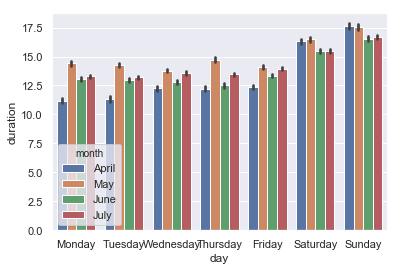

In [324]:
ax=sns.barplot(x='day',y='duration',data=dfcomb,order=week,hue="month")

## Plot the usage for every day

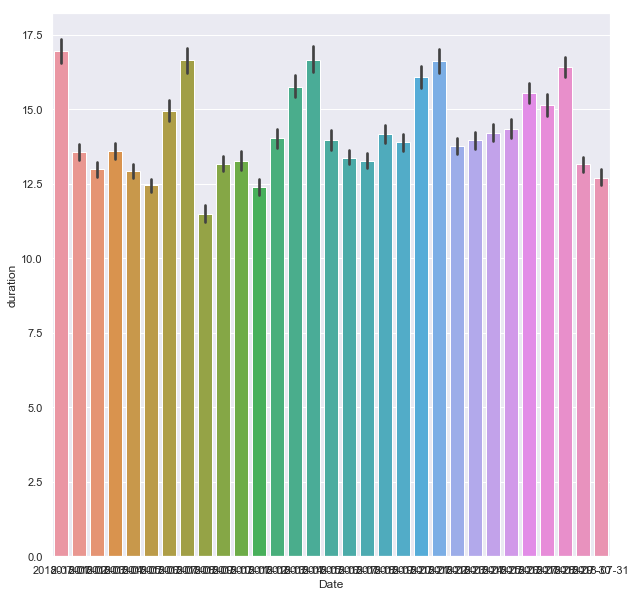

In [326]:
plt.rcParams['figure.figsize']=(10,10)
sns.barplot(x='Date',y='duration',data=july18)

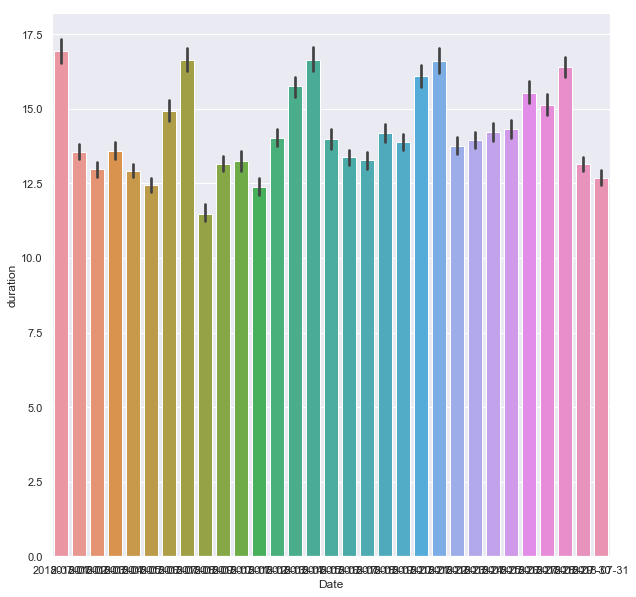

In [327]:
#plt.figure(figsize=(25,20))
plt.rcParams['figure.figsize']=(10,10)
sns.barplot(x='Date',y='duration',data=july18)

## Load weather data

In [328]:
weather=pd.read_csv('weather.csv',sep=';',parse_dates=['Date'])
weather['Max']=(weather['Max'].str.split('°')).str.join('').convert_objects(convert_numeric=True)
weather['Min']=(weather['Min'].str.split('°')).str.join('').convert_objects(convert_numeric=True)
weather['Average']=(weather['Average'].str.split('°')).str.join('').convert_objects(convert_numeric=True)
weather['Precipitation']=(weather['Precipitation'].str.split(' mm')).str.join('').convert_objects(convert_numeric=True)
weather['Date']=weather['Date'].dt.date
weather.head()

/Users/param/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/Users/param/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/param/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.

,Date,Max,Min,Average,Precipitation
0,2018-08-27,17.1,8.8,13.2,0.1
1,2018-08-26,19.5,6.6,13.0,0.0
2,2018-08-25,19.1,5.0,12.8,3.2
3,2018-08-24,20.7,12.6,15.6,0.2
4,2018-08-23,20.2,11.1,15.8,2.6


# Take the average duration of bike ride

In [329]:
#weather.set_index('Date',inplace=True);
#weather.head()
#weather['Date'];

In [330]:
#wjul=weather[((weather.Date).dt.month==7)&((weather.Date).dt.year==2018)]
#wjun=weather[((weather.Date).dt.month==6)&((weather.Date).dt.year==2018)]
#wmay=weather[((weather.Date).dt.month==5)&((weather.Date).dt.year==2018)]
#wapr=weather[((weather.Date).dt.month==4)&((weather.Date).dt.year==2018)]
#wjul.head()

In [331]:
temp=pd.DataFrame(dfcomb.groupby('Date')['duration'].mean())
temp.head()

,duration
Date,
2018-04-01,8.916667
2018-04-04,11.108789
2018-04-05,7.684973
2018-04-06,11.965465
2018-04-07,15.677646


In [332]:
temp2=pd.DataFrame(dfcomb.groupby('Date')['duration'].count())
temp2.head()

,duration
Date,
2018-04-01,1
2018-04-04,476
2018-04-05,427
2018-04-06,929
2018-04-07,504


In [333]:
temp=pd.merge(temp,temp2,on='Date')

In [334]:
dataavg=pd.merge(weather,temp,on='Date')
dataavg.head()

,Date,Max,Min,Average,Precipitation,duration_x,duration_y
0,2018-07-31,30.9,17.2,23.1,2.4,12.697460,14383
1,2018-07-30,27.3,14.1,20.9,0.0,13.153885,14385
2,2018-07-29,28.2,20.4,22.8,15.7,16.398688,9591
3,2018-07-28,30.9,21.3,25.4,0.0,15.138273,8111
4,2018-07-27,34.2,14.9,25.1,0.0,15.539831,13879


In [335]:
dataavg.columns=['Date','Max_Temp','Min_Temp','Avg_Temp','Prec','Avg_ride','no_of_rides']

In [336]:
dataavg.describe()

,Max_Temp,Min_Temp,Avg_Temp,Prec,Avg_ride,no_of_rides
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,22.498333,9.627500,15.954167,1.134167,13.985755,13597.175000
std,7.251554,6.034814,6.407085,3.021339,2.122744,4824.449642
min,4.500000,-8.100000,-1.200000,0.000000,7.684973,1.000000
25%,17.475000,5.675000,10.325000,0.000000,12.672624,11388.750000
50%,23.950000,10.500000,17.300000,0.000000,13.740130,14358.000000
75%,28.225000,14.525000,21.300000,0.025000,15.564556,16919.250000
max,34.200000,21.300000,25.400000,15.900000,19.125404,21768.000000


In [337]:
dataavg['Rain']=dataavg['Prec']>0.0

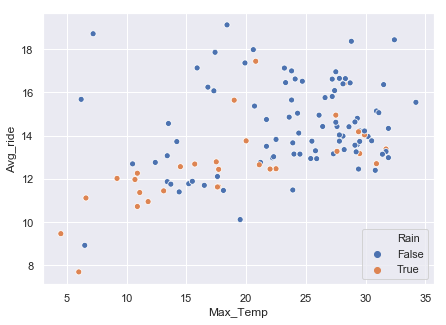

In [338]:
plt.rcParams['figure.figsize']=(7,5)
ax = sns.scatterplot(x="Max_Temp", y="Avg_ride", data=dataavg,hue='Rain')

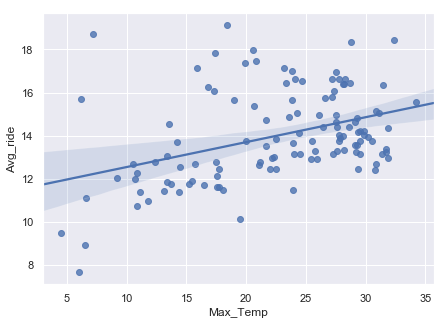

In [339]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

X= pd.DataFrame(dataavg["Max_Temp"])

X_train, X_test, y_train, y_test = train_test_split(X,dataavg["Avg_ride"] , test_size=0.33, random_state=324)
regr = LinearRegression()
regr.fit(X_train, y_train)
y_prediction = regr.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
#ax = sns.scatterplot(x="Max_Temp", y="Avg_ride", data=dataavg,hue='Rain')
#sns.lineplot(x=X_test, y=y_prediction)
ax = sns.regplot(x="Max_Temp", y="Avg_ride", data=dataavg)

In [340]:
print(RMSE)
y_prediction

2.097703282168997


array([15.01946409, 14.9074945 , 14.66955912, 14.76753251, 14.9354869 ,
       13.49387842, 13.87177579, 14.8655059 , 14.73954011, 15.14542988,
       15.01946409, 14.26366935, 14.8375135 , 14.29166175, 14.40363134,
       15.29938806, 15.22940707, 14.52959713, 15.62130064, 12.5701293 ,
       12.71009129, 14.96347929, 15.18741847, 12.66810269, 14.16569596,
       12.85005328, 15.24340327, 13.31192784, 14.72554391, 11.84232696,
       15.10344128, 13.29793164, 12.48615211, 13.36791263, 12.96202287,
       14.17969216, 15.27139567, 12.38817871, 13.40990123, 13.18596205])

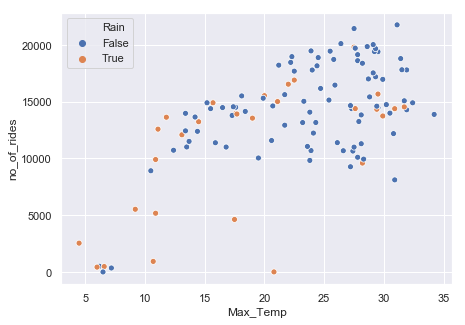

In [341]:
sns.scatterplot(x="Max_Temp", y="no_of_rides", data=dataavg,hue='Rain')

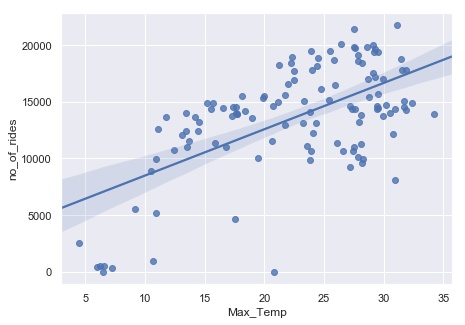

In [342]:
X= pd.DataFrame(dataavg["Max_Temp"])

X_train, X_test, y_train, y_test = train_test_split(X,dataavg["no_of_rides"] , test_size=0.33, random_state=324)
regr = LinearRegression()
regr.fit(X_train, y_train)
y_prediction = regr.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
#ax = sns.scatterplot(x="Max_Temp", y="Avg_ride", data=dataavg,hue='Rain')
#sns.lineplot(x=X_test, y=y_prediction)
ax = sns.regplot(x="Max_Temp", y="no_of_rides", data=dataavg)

In [343]:
july17=pd.read_csv('trips-2017.7.1-2017.7.31.csv',parse_dates=['Start time','End time'])
july16=pd.read_csv('trips-2016.7.1-2016.7.31.csv',parse_dates=['Start time','End time'])

july16['duration']= ((july16['End time']-july16['Start time']).dt.total_seconds())/60.0
july17['duration']= ((july17['End time']-july17['Start time']).dt.total_seconds())/60.0

In [344]:
print(july18.shape,july17.shape,july16.shape)

(412169, 9) (387918, 5) (294000, 5)


In [345]:
july16['duration'].mean()

36.55301921768665

In [346]:
((july17['End time']-july17['Start time']).dt.total_seconds()/60.0).mean()

14.51446912319992

In [347]:
((july18['End time']-july18['Start time']).dt.total_seconds()/60.0).mean()

14.061431435487053

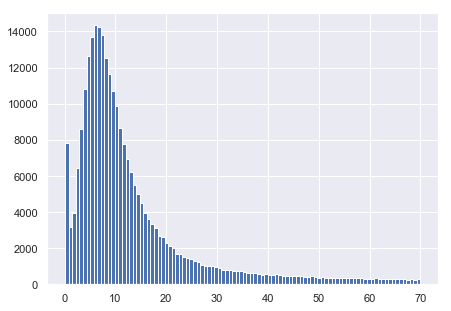

In [348]:

july16.duration[(july16.duration < 70.0)&(july16.duration >0.0)].hist(bins=100)

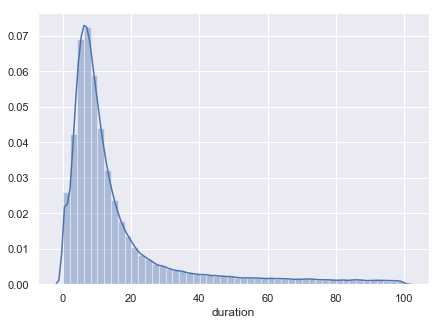

In [195]:
sns.distplot(july16.duration[(july16.duration < 100.0)&(july16.duration >0.0)])

In [65]:
july16.duration[(july16.duration < 70.0)&(july18.duration >1.0)].mean()

13.339874048083745

In [73]:
july18.duration[(july18.duration < 70.0)&(july18.duration >1.0)].mean()

12.893219287229954

In [76]:
july16.duration[(july16.duration < 70.0)&(july16.duration >1.0)].quantile(0.999999)

69.98333333333333

In [183]:
july18.duration.quantile(0.999)

246.549933333336

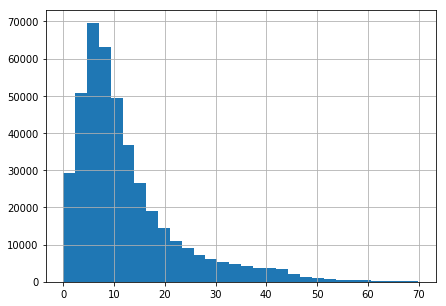

In [181]:
july18.duration[(july18.duration < 70.0)].hist(bins=30)

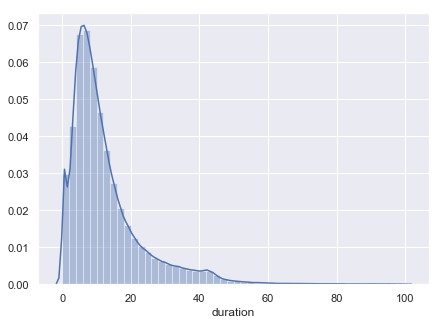

In [194]:
sns.set(color_codes=True)
sns.distplot(july18.duration[(july18.duration < 100.0)])

In [349]:
sum(dfcomb['Start station']==dfcomb['End station'])
#All start and end stations in April have the same entry

60473

In [350]:
dfcomb.head()

,Start station,Start time,End station,End time,duration,Date,day,month,journey
0,222,2018-04-01 13:34:02,222,2018-04-01 13:42:57,8.916667,2018-04-01,Sunday,April,222222
3,274,2018-04-04 05:06:49,204,2018-04-04 05:11:21,4.533333,2018-04-04,Wednesday,April,274204
4,247,2018-04-04 05:11:48,279,2018-04-04 05:15:57,4.150000,2018-04-04,Wednesday,April,247279
5,274,2018-04-04 05:27:08,247,2018-04-04 05:30:41,3.550000,2018-04-04,Wednesday,April,274247
6,274,2018-04-04 05:27:32,204,2018-04-04 05:31:56,4.400000,2018-04-04,Wednesday,April,274204


In [351]:
temp1=pd.DataFrame(dfcomb.groupby('journey')['duration'].mean())
temp1['journey']=temp1.index
temp2=pd.DataFrame(dfcomb.groupby('journey')['duration'].count())
temp2['journey']=temp2.index
datajourney=pd.merge(temp1,temp2,on='journey')

/Users/param/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'journey' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [352]:
datajourney.head()

,duration_x,journey,duration_y
0,19.085484,157157,496
1,23.913333,157158,5
2,22.886111,157159,6
3,19.904286,157160,70
4,20.383333,157161,2


In [353]:
datajourney.columns=['avg_ride','journey','no_of_rides']

In [354]:
datajourney.head()

,avg_ride,journey,no_of_rides
0,19.085484,157157,496
1,23.913333,157158,5
2,22.886111,157159,6
3,19.904286,157160,70
4,20.383333,157161,2


In [355]:
datajourney.describe()

,avg_ride,no_of_rides
count,49564.000000,49564.000000
mean,19.261188,32.920285
std,15.729679,72.700833
min,1.750000,1.000000
25%,12.074948,4.000000
50%,16.658333,11.000000
75%,22.650000,33.000000
max,709.900000,3674.000000


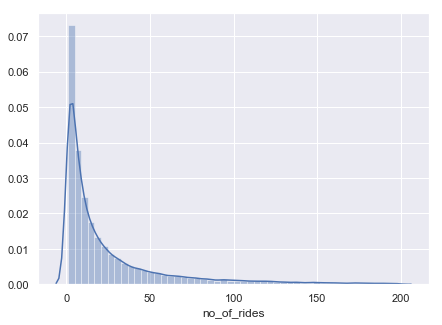

In [356]:
sns.distplot(datajourney.no_of_rides[datajourney.no_of_rides<200])

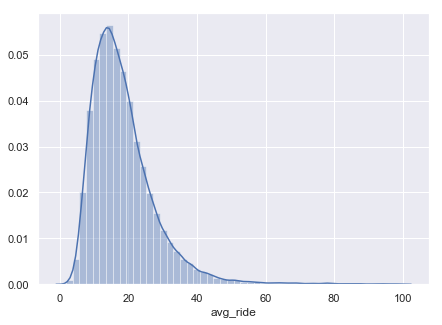

In [357]:
sns.distplot(datajourney.avg_ride[datajourney.avg_ride<100])

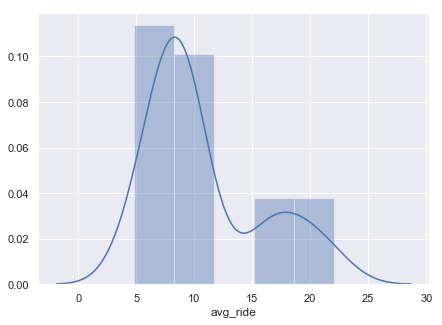

In [359]:
sns.distplot(datajourney.avg_ride[(datajourney.no_of_rides>1000)])

In [366]:
freq_journey=datajourney[(datajourney.no_of_rides>1000)]
freq_journey.head()

,avg_ride,journey,no_of_rides
7778,9.619915,195292,1914
7956,4.786472,196233,1439
9689,17.502102,204204,1094
9754,7.719275,204274,3674
9950,22.014906,205256,1136


In [361]:
datajourney.iloc[datajourney.no_of_rides.argmax()]

/Users/param/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


avg_ride       7.71928
journey         204274
no_of_rides       3674
Name: 9754, dtype: object

In [376]:
import json
from pandas.io.json import json_normalize
#pd.read_json('stations.json',lines=True)
#df = json_normalize(json['result'])
with open('stations.json') as f:
    data = json.load(f)

In [384]:
temp=pd.DataFrame(data)
temp=temp.stations.apply(pd.Series)

In [387]:
temp.describe()

,id,number_of_locks
count,230.000000,230.000000
mean,302.113043,22.534783
std,95.292587,9.572345
min,157.000000,6.000000
25%,220.250000,15.000000
50%,286.000000,21.000000
75%,387.500000,27.000000
max,487.000000,60.000000


In [385]:
temp[temp.id==204]

,id,in_service,title,subtitle,number_of_locks,center,bounds
42,204,True,Paléhaven,langs Strandgata,48,"{'latitude': 59.910286, 'longitude': 10.750012}","[{'latitude': 59.910122, 'longitude': 10.74978..."


In [386]:
temp[temp.id==274]

,id,in_service,title,subtitle,number_of_locks,center,bounds
106,274,True,Sukkerbiten,ved gangbroen til Sørenga,36,"{'latitude': 59.90503, 'longitude': 10.753658}","[{'latitude': 59.905354, 'longitude': 10.75349..."


In [216]:
#Lets see the most common route
dfcomb['journey']=dfcomb['Start station']+dfcomb['End station']

In [217]:
dfcomb['journey'].head()

0    222222
1    222222
2    222222
3    222222
4    222222
Name: journey, dtype: object

In [218]:
july18['journey']=july18['Start station']+july18['End station']

In [220]:
july18.shape

(428669, 9)

In [222]:
sum(july18['journey']=='207177')

428669

In [224]:
june18['journey']=june18['Start station']+june18['End station']
june18.journey.head()

0    222272
1    222272
2    222272
3    222272
4    222272
Name: journey, dtype: object

In [225]:
june18.head()

,Start station,Start time,End station,End time,duration,Date,day,month,journey
0,222,2018-06-01 04:00:03,272,2018-06-01 04:04:39,4.600000,2018-06-01,Friday,June,222272
1,222,2018-06-01 04:00:03,272,2018-06-01 04:06:18,6.250000,2018-06-01,Friday,June,222272
2,222,2018-06-01 04:00:05,272,2018-06-01 04:11:06,11.016667,2018-06-01,Friday,June,222272
3,222,2018-06-01 04:00:09,272,2018-06-01 04:06:01,5.866667,2018-06-01,Friday,June,222272
4,222,2018-06-01 04:00:11,272,2018-06-01 04:04:47,4.600000,2018-06-01,Friday,June,222272


In [105]:
df=pd.concat([April,May,June,July],axis=1,sort=False)
#df=df.transpose()
df.index.name = 'Day'
df.reset_index(inplace=True)
df.head(7)

,Day,April,May,June,July
0,Monday,12.414748,16.490992,14.466903,13.857905
1,Tuesday,12.469228,15.237743,14.236397,14.904777
2,Wednesday,13.891287,15.196284,13.811178,14.460248
3,Thursday,13.532182,16.162557,13.636014,14.358371
4,Friday,14.666142,17.083738,16.412188,15.302542
5,Saturday,19.457949,21.977323,17.749821,17.528012
6,Sunday,19.516364,20.839769,17.835985,17.493731


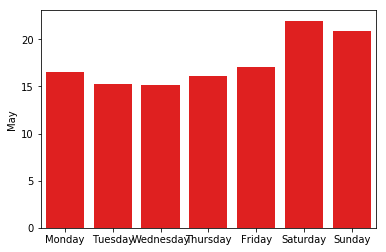

In [106]:
ax=sns.barplot(x=week,y='April',data=df,color="green")
sns.barplot(x=week,y='May',data=df,color="red",ax=ax)

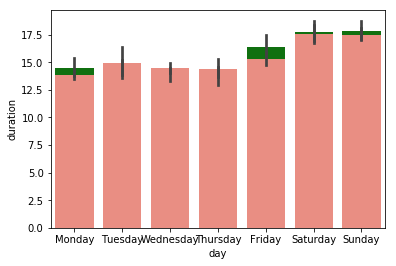

In [56]:
week=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ax=sns.barplot(x='day',y='duration',data=june18,order=week,color="green")
sns.barplot(x='day',y='duration',data=july18,order=week,color="salmon",ax=ax)
#sns.barplot(x='day',y='duration',data=may18,order=week,color="red",ax=ax)

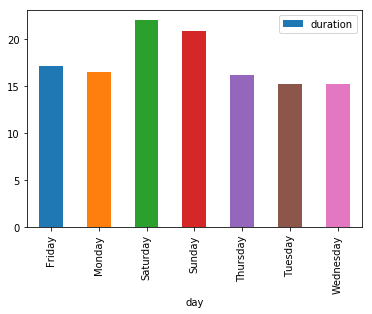

In [23]:
may18.groupby('day').mean().plot(kind='bar',y='duration')

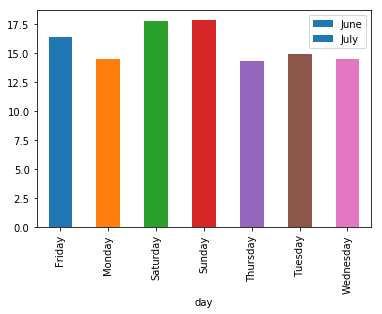

In [15]:
ax=june18.groupby('day').mean().plot(kind='bar',y='duration')
july18.groupby('day').mean().plot(kind='bar',y='duration',ax=ax)
ax.legend(["June", "July"])

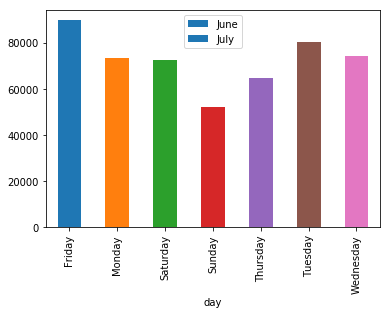

In [17]:
ax=june18.groupby('day').count().plot(kind='bar',y='duration')
july18.groupby('day').count().plot(kind='bar',y='duration',ax=ax)
ax.legend(["June", "July"])

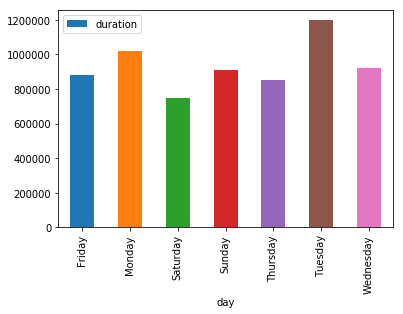

In [11]:
july18.groupby('day').sum().plot(kind='bar',y='duration')

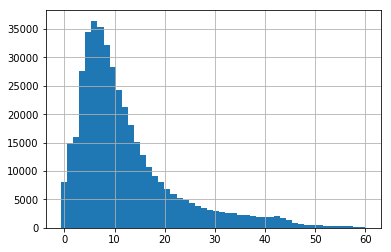

In [41]:
%matplotlib inline
july18.duration[(july18.duration < 60.0)].hist(bins=50)

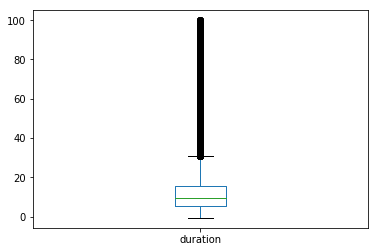

In [42]:
july18.duration[(july18.duration < 100.0)].plot.box()

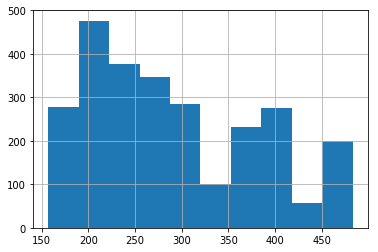

In [11]:
july18['Start station'][(july18.duration > 100.0)].hist()

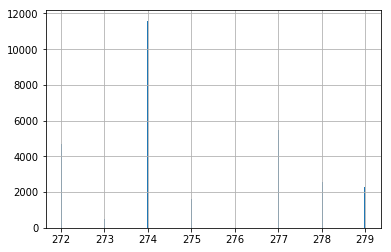

In [19]:
july18['Start station'][(july18.duration < 100.0)&(july18['Start station'] < 280)&(july18['Start station'] > 270)].hist(bins=300)

In [45]:
busystation=july18[july18['Start station'] == 274]

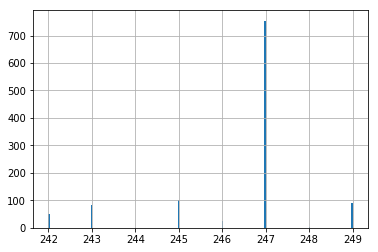

In [14]:
%matplotlib inline
busystation['End station'][(busystation['End station']<250)&(busystation['End station']>240)].hist(bins=200)

In [46]:
busystation2=busystation[busystation['End station']==247]

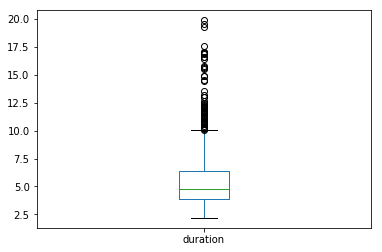

In [24]:
busystation2.duration[busystation2.duration<20].plot.box()

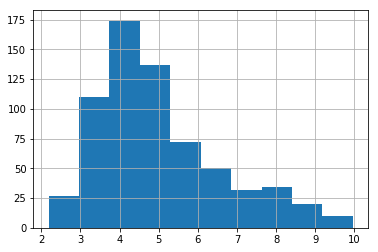

In [25]:
busystation2.duration[busystation2.duration<10].hist()

In [56]:
busystation2.shape

(754, 7)

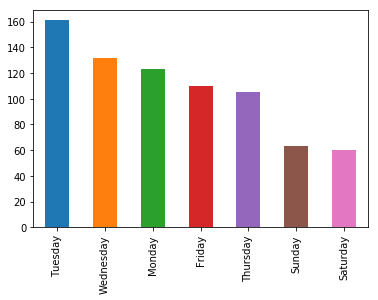

In [61]:
pd.value_counts(busystation2['day']).plot.bar()

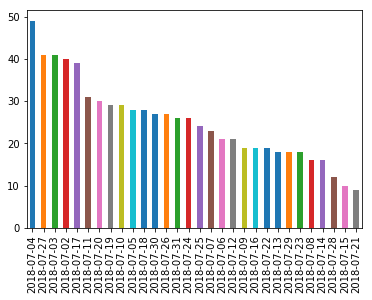

In [62]:
pd.value_counts(busystation2['date']).plot.bar()

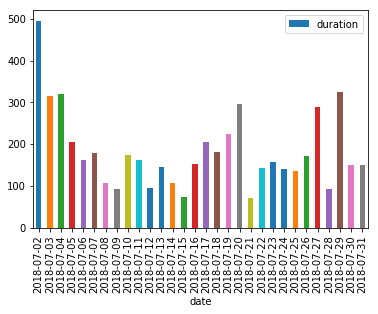

In [70]:
busystation2.groupby('date').sum().plot(kind='bar',y='duration')

In [42]:
busystation2['date']#=='2018-07-01'

14418     2018-07-02
14480     2018-07-02
15091     2018-07-02
15720     2018-07-02
16076     2018-07-02
16907     2018-07-02
17096     2018-07-02
17817     2018-07-02
18075     2018-07-02
18178     2018-07-02
18267     2018-07-02
18272     2018-07-02
18625     2018-07-02
18972     2018-07-02
19359     2018-07-02
19393     2018-07-02
19838     2018-07-02
21462     2018-07-02
21689     2018-07-02
21696     2018-07-02
21765     2018-07-02
21818     2018-07-02
21856     2018-07-02
22384     2018-07-02
22609     2018-07-02
22809     2018-07-02
22815     2018-07-02
23546     2018-07-02
23805     2018-07-02
23808     2018-07-02
             ...    
410738    2018-07-30
410877    2018-07-30
412654    2018-07-30
412924    2018-07-30
414404    2018-07-31
414602    2018-07-31
414747    2018-07-31
414844    2018-07-31
415056    2018-07-31
415390    2018-07-31
416010    2018-07-31
416358    2018-07-31
418111    2018-07-31
418119    2018-07-31
418217    2018-07-31
418369    2018-07-31
418859    201